<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/Week%203/Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize

In [25]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv'
df = pd.read_csv(url)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
df["income"] = df["income"].str.strip().str.replace(".", "", regex=False)
y = df["income"]
X = df.drop(columns=["income"])
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [27]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

In [28]:
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

# Predict
knn_pred = knn_pipeline.predict(X_test)
dt_pred = dt_pipeline.predict(X_test)

In [30]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="macro"))
    print("Recall   :", recall_score(y_test, y_pred, average="macro"))
    print("F1-Score :", f1_score(y_test, y_pred, average="macro"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, dt_pred, "Decision Tree")


📊 K-Nearest Neighbors Evaluation:
Accuracy : 0.7790971440270242
Precision: 0.6920841140826905
Recall   : 0.6301991927821182
F1-Score : 0.6455064450677048

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86      7414
        >50K       0.57      0.34      0.43      2355

    accuracy                           0.78      9769
   macro avg       0.69      0.63      0.65      9769
weighted avg       0.76      0.78      0.76      9769


📊 Decision Tree Evaluation:
Accuracy : 0.8158460436073293
Precision: 0.7484214279819488
Recall   : 0.7520553872658429
F1-Score : 0.7501974783072356

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7414
        >50K       0.62      0.63      0.62      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82    

In [42]:
def plot_binary_roc_comparison(pipelines, X_test, y_test, model_names):
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes).ravel()

    plt.figure()

    for pipeline, name in zip(pipelines, model_names):

        y_score = pipeline.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        auc_score = roc_auc_score(y_test_bin, y_score)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


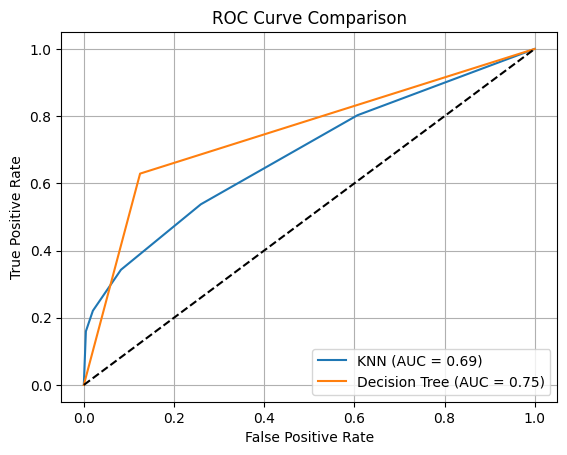

In [41]:
plot_binary_roc_comparison(
    pipelines=[knn_pipeline, dt_pipeline],
    X_test=X_test,
    y_test=y_test,
    model_names=["KNN", "Decision Tree"]
)

# Matriks Evaluasi
## **Accuracy**
Accuracy mengukur seberapa sering model membuat prediksi yang benar dibandingkan dengan total data.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:  
- $TP$ = True Positive  
- $TN$ = True Negative  
- $FP$ = False Positive  
- $FN$ = False Negative  

Semakin tinggi **accuracy**, semakin baik performa model secara keseluruhan.

## **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

$$
Precision = \frac{TP}{TP + FP}
$$

Precision tinggi berarti model jarang salah dalam memprediksi kelas positif. Berguna ketika **false positive** harus diminimalkan, misalnya dalam **deteksi kanker**.

## **Recall**
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

$$
Recall = \frac{TP}{TP + FN}
$$

Recall tinggi berarti model tidak melewatkan banyak sampel positif. Sangat penting dalam **deteksi penyakit atau penipuan**, di mana **false negative** harus diminimalkan.

##**F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall. Berguna saat dataset tidak seimbang.

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

F1 Score tinggi berarti keseimbangan yang baik antara Precision dan Recall.

## **ROC dan AUC**
ROC (**Receiver Operating Characteristic**) adalah kurva yang menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

Jika nilai semakin mendekati 1, semakin bagus modelnya. Sedangkan jika nilai di bawah 0.5, model tersebut lebih buruk dari tebakan acak.